In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [25]:
df=pd.read_csv("/content/GOOGL.csv")
df

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2007-10-17,315.54,317.32,311.11,317.06,12048900,13.498014,323.694527,269.702473,308.31,...,47.102,46.2860,44.1214,1541.24,1538.53,1562.47,13892.54,13912.94,14078.69,320.13
1,2007-10-18,318.02,321.01,314.56,320.13,24553800,13.603549,326.077599,271.663401,317.06,...,47.280,46.4535,44.2096,1540.08,1541.24,1554.41,13888.96,13892.54,14015.12,322.68
2,2007-10-19,327.61,329.57,321.94,322.68,31546400,13.859332,328.706664,273.269336,320.13,...,47.246,46.5460,44.2940,1500.63,1540.08,1561.80,13522.02,13888.96,14093.08,325.70
3,2007-10-22,319.65,327.83,318.46,325.70,13315400,14.319036,331.696571,274.420429,322.68,...,47.239,46.6560,44.3972,1506.33,1500.63,1548.71,13566.97,13522.02,13984.80,338.22
4,2007-10-23,330.96,339.14,330.33,338.22,13573800,15.652638,337.035777,274.425223,325.70,...,47.310,46.7945,44.5146,1519.59,1506.33,1538.53,13676.23,13566.97,13912.94,338.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,2020-08-07,1509.04,1520.09,1486.27,1498.37,1385900,25.922584,1567.479668,1463.789332,1504.95,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,1496.82
3225,2020-08-10,1490.80,1507.15,1477.49,1496.82,1027300,26.255975,1567.375950,1462.352050,1498.37,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,1480.54
3226,2020-08-11,1494.00,1510.44,1478.19,1480.54,1554900,27.298591,1567.445182,1458.250818,1496.82,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,1507.24
3227,2020-08-12,1487.12,1511.67,1485.00,1507.24,1126600,27.308756,1566.983511,1457.748489,1480.54,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,1516.65


In [26]:
df.shape


(3229, 64)

In [27]:
#Data Cleaning

In [28]:
df.duplicated().sum().any()

False

In [29]:
df.isnull().values.any()

False

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3229 entries, 0 to 3228
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              3229 non-null   object 
 1   Open              3229 non-null   float64
 2   High              3229 non-null   float64
 3   Low               3229 non-null   float64
 4   Close(t)          3229 non-null   float64
 5   Volume            3229 non-null   int64  
 6   SD20              3229 non-null   float64
 7   Upper_Band        3229 non-null   float64
 8   Lower_Band        3229 non-null   float64
 9   S_Close(t-1)      3229 non-null   float64
 10  S_Close(t-2)      3229 non-null   float64
 11  S_Close(t-3)      3229 non-null   float64
 12  S_Close(t-5)      3229 non-null   float64
 13  S_Open(t-1)       3229 non-null   float64
 14  MA5               3229 non-null   float64
 15  MA10              3229 non-null   float64
 16  MA20              3229 non-null   float64


In [31]:
df.describe()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
count,3229.000000,3229.000000,3229.000000,3229.000000,3.229000e+03,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,...,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000,3229.000000
mean,615.820059,621.492471,609.775621,615.836646,4.489683e+06,15.845429,643.996784,580.615068,615.462431,615.091768,...,95.649627,95.310540,94.320622,1869.748390,1869.180133,1866.950836,16754.672013,16750.341329,16733.395841,616.204429
std,373.529679,377.037479,370.134402,373.867807,4.244228e+06,13.565474,388.549262,353.775668,373.570491,373.279044,...,56.235950,55.841654,54.745911,672.900632,672.404990,670.449923,5754.239059,5751.112171,5738.891082,374.157810
min,131.390000,134.820000,123.770000,128.850000,5.206000e+05,2.385956,160.795478,120.186229,128.850000,128.850000,...,24.048000,24.828500,25.837200,676.530000,676.530000,676.530000,6547.050000,6547.050000,6547.050000,128.850000
25%,290.830000,293.400000,287.930000,290.580000,1.673800e+06,7.381170,307.811652,274.591811,290.580000,290.580000,...,48.441000,48.366500,48.165000,1300.670000,1300.670000,1300.670000,12151.260000,12151.260000,12151.260000,290.580000
50%,537.640000,541.950000,532.240000,537.760000,3.206700e+06,11.375394,558.422072,512.251998,537.550000,537.510000,...,82.214000,81.957500,82.553200,1852.560000,1852.210000,1848.380000,16222.170000,16221.140000,16198.410000,538.000000
75%,939.070000,944.080000,931.250000,938.080000,5.604100e+06,19.973213,957.583570,911.598582,937.820000,937.430000,...,134.861000,135.017000,131.383600,2402.320000,2400.670000,2398.420000,21006.940000,21005.710000,20981.330000,938.930000
max,1585.030000,1587.050000,1552.620000,1564.850000,4.652800e+07,129.197311,1612.148227,1477.404581,1564.850000,1564.850000,...,270.255000,265.454000,255.044600,3386.150000,3386.150000,3386.150000,29551.420000,29551.420000,29551.420000,1564.850000


In [32]:
#checking correlations of all columns
print(df.corr())


                   Open      High       Low  Close(t)    Volume      SD20  \
Open           1.000000  0.999865  0.999820  0.999690 -0.563844  0.628831   
High           0.999865  1.000000  0.999765  0.999836 -0.561274  0.633040   
Low            0.999820  0.999765  1.000000  0.999851 -0.567466  0.624060   
Close(t)       0.999690  0.999836  0.999851  1.000000 -0.564480  0.628753   
Volume        -0.563844 -0.561274 -0.567466 -0.564480  1.000000 -0.201610   
...                 ...       ...       ...       ...       ...       ...   
SnP(t-5)       0.977468  0.977209  0.977553  0.977240 -0.579119  0.596407   
DJIA_Close     0.974570  0.974124  0.975143  0.974674 -0.573052  0.578761   
DJIA(t-1))     0.974527  0.974011  0.974920  0.974210 -0.571821  0.580762   
DJIA(t-5)      0.973076  0.972790  0.973232  0.972851 -0.566052  0.590499   
Close_forcast  0.999230  0.999364  0.999393  0.999455 -0.564826  0.627709   

               Upper_Band  Lower_Band  S_Close(t-1)  S_Close(t-2)  ...  \
O

<ipython-input-32-378f29a9f92f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<ipython-input-33-acbaf595e8e8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="Blues",annot=True)


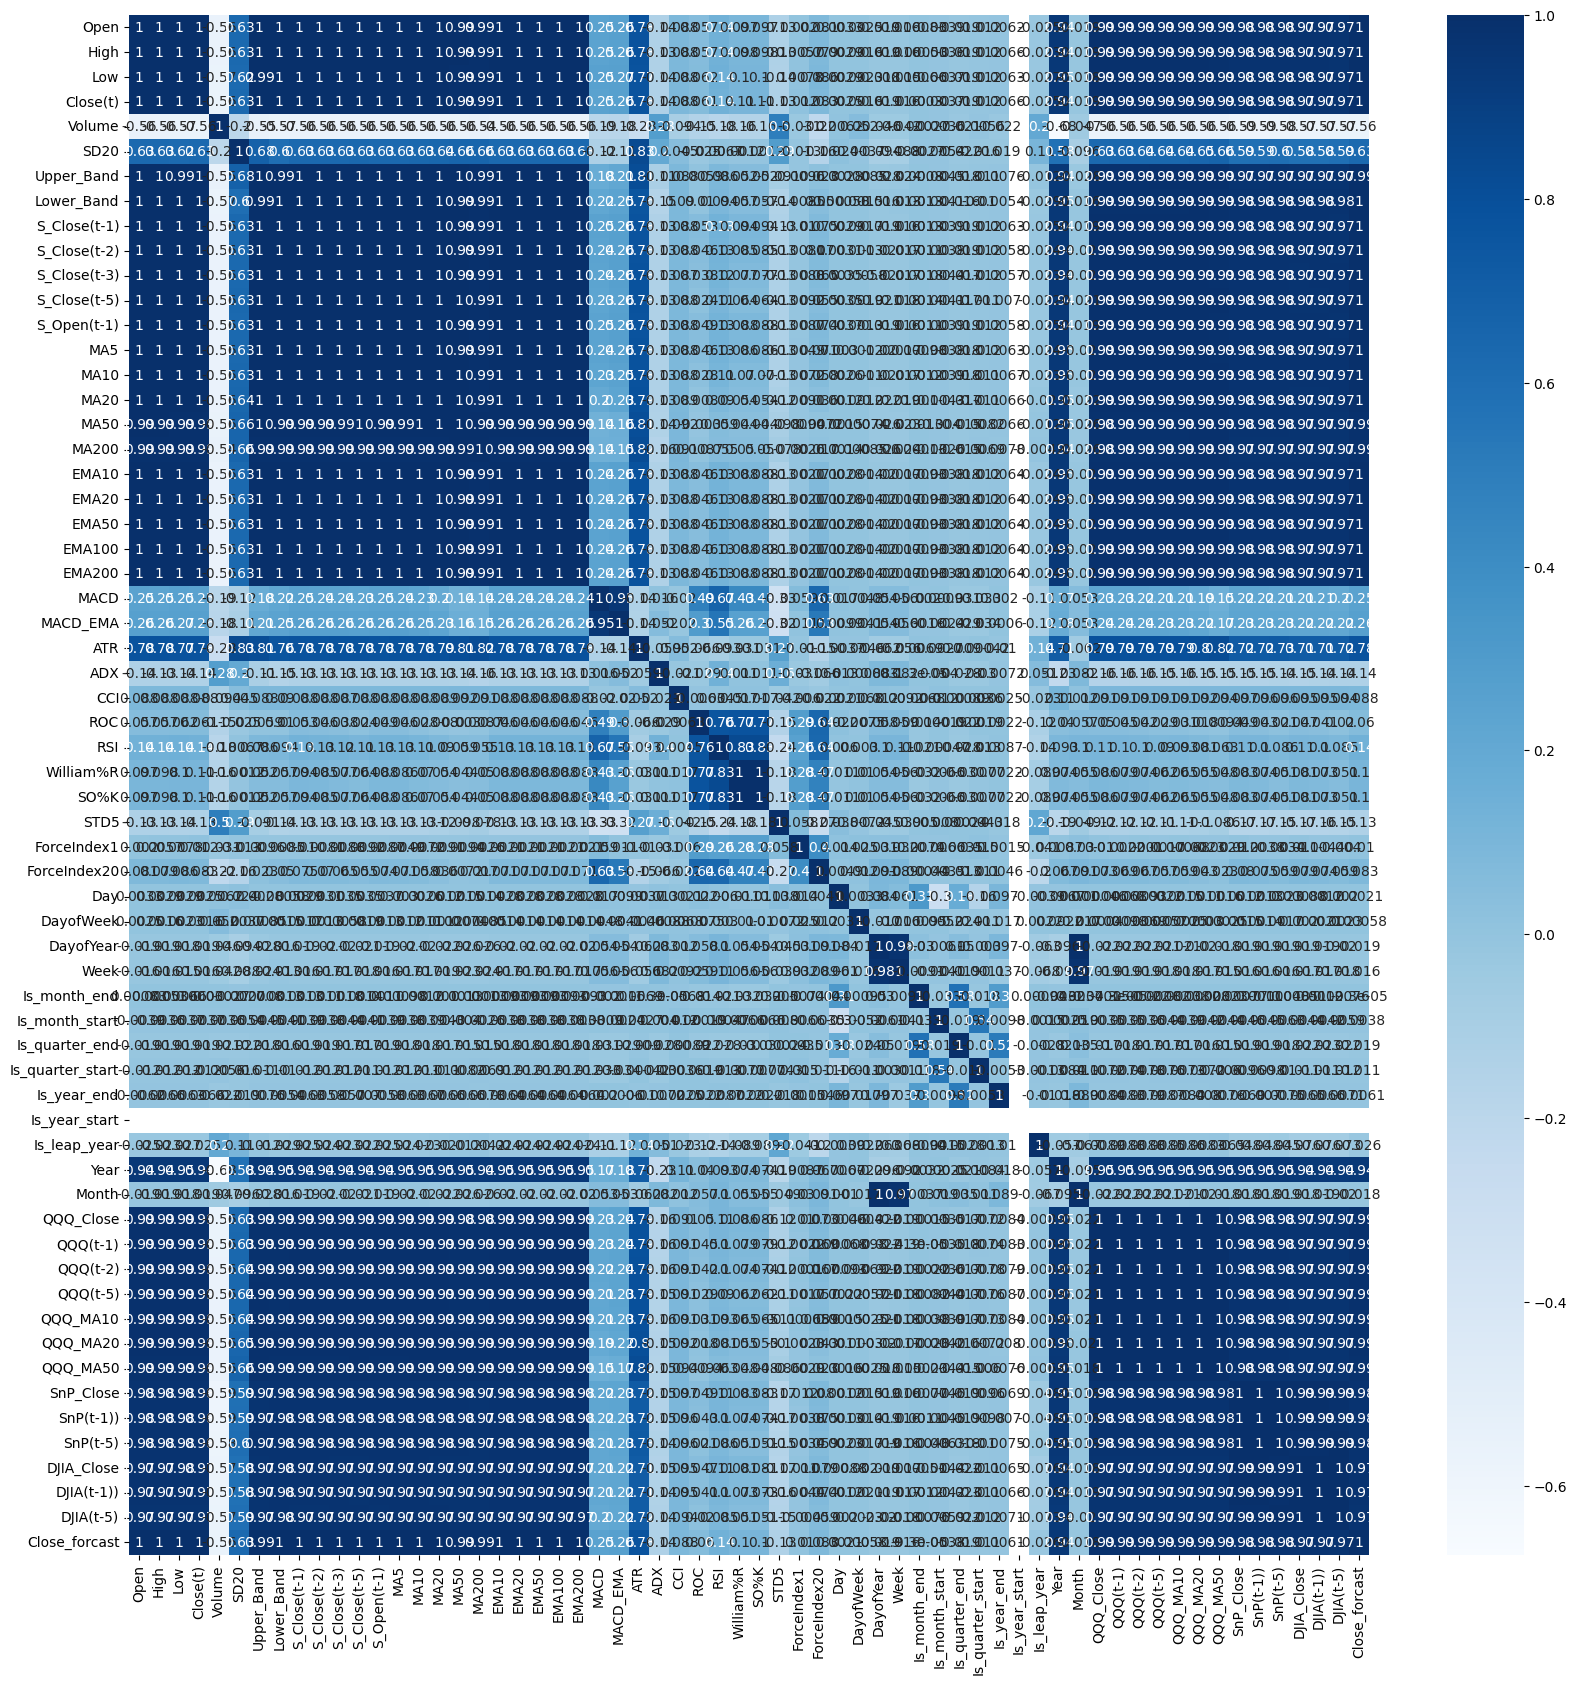

In [33]:
#visualizing correlations
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()


<Axes: >

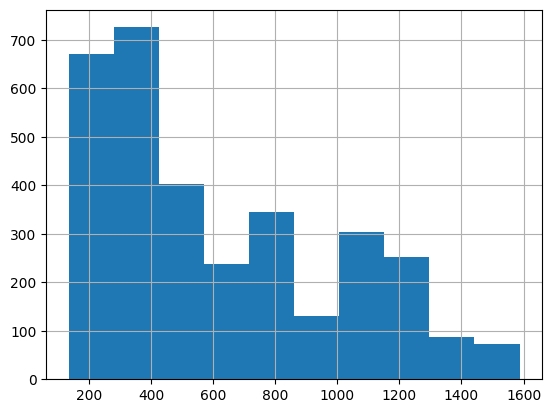

In [34]:
df['High'].hist()

<Axes: >

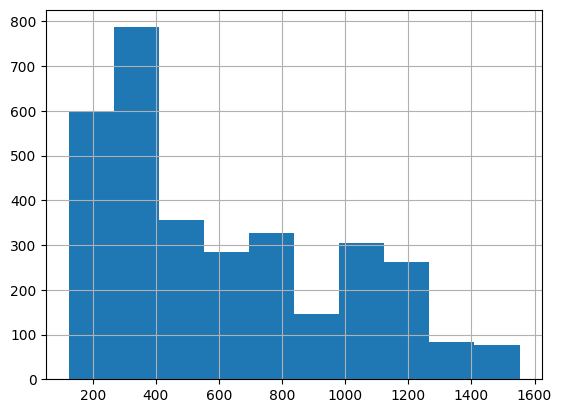

In [35]:
df['Low'].hist()

<Axes: >

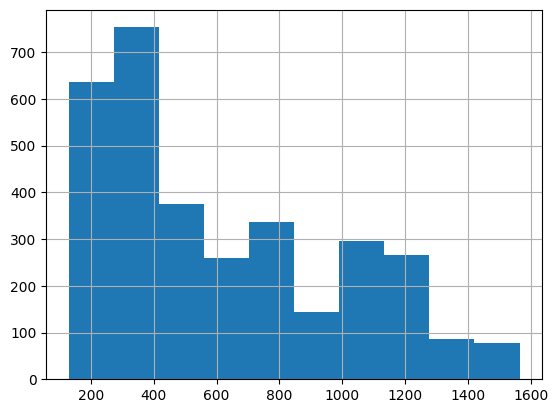

In [36]:
df['Close(t)'].hist()

<Axes: >

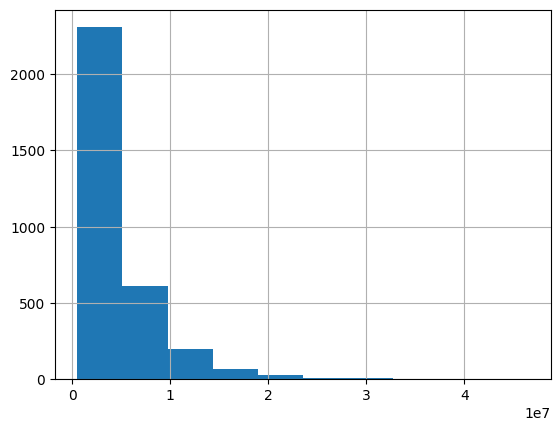

In [37]:
df['Volume'].hist()

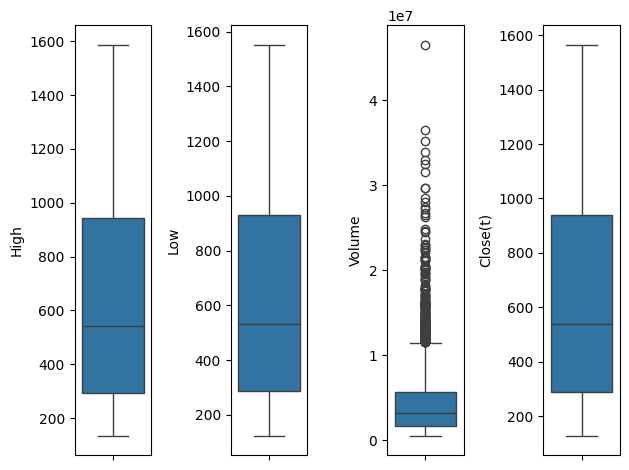

In [38]:
f, axes = plt.subplots(1, 4)
sns.boxplot(y="High", data=df, ax=axes[0])
sns.boxplot(y="Low", data=df, ax=axes[1])
sns.boxplot(y="Volume", data=df, ax=axes[2])
sns.boxplot(y="Close(t)", data=df, ax=axes[3])
plt.tight_layout()

In [23]:
x=df[["Open","High","Volume"]].values
y=df['Close(t)'].values

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
print("Train",x_train.shape)
print("Test",x_test.shape)

Train (2583, 3)
Test (646, 3)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
import statsmodels.api as sm
regressor=LinearRegression()
model=regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
y_pred

array([ 445.05363928,  754.87194407,  280.93184499, 1119.02765068,
       1081.66807466,  427.88198452,  777.78716987, 1461.81905254,
        293.62490474,  860.32482235,  788.19364375,  293.06672754,
        440.30599135,  728.46139218, 1095.48279493,  255.00799326,
        227.34091114,  524.07773303,  996.20829823,  342.43362301,
       1073.01895388,  250.57659259,  310.26970445,  985.02411282,
        530.37557786,  607.84897096,  399.72443569, 1166.71231069,
        337.15006098,  218.63747039,  248.67687545, 1087.35203041,
        237.83536148,  309.3869672 ,  259.06765094,  539.40800865,
        210.11402256, 1183.04671886,  383.43583832, 1198.03678438,
        293.92984309, 1523.74514712,  397.00526866, 1115.97807465,
       1016.17066193,  803.90270756, 1154.93623715,  296.11052618,
        293.30241683,  663.00902438, 1378.93063015,  529.71922449,
        324.56268785, 1107.72540064,  538.52743106,  584.42810426,
       1170.894509  ,  145.22585219,  232.23350726,  583.42021

In [45]:
#validating the fit
print("Model coefficint",regressor.coef_)
print("Model Intercept",regressor.intercept_)

Model coefficint [-8.09423893e-02  1.06886872e+00 -4.32766108e-07]
Model Intercept 3.3691539713767042


In [48]:
#Prediction table of actual values vs predicted values
dframe=pd.DataFrame(y_test,y_pred)
dfr=pd.DataFrame({"ACtual_Price":y_test,"Predicted_price":y_pred})
print(dfr)

     ACtual_Price  Predicted_price
0          446.78       445.053639
1          757.08       754.871944
2          282.39       280.931845
3         1128.09      1119.027651
4         1075.31      1081.668075
..            ...              ...
641        262.69       265.033092
642        433.30       434.663924
643       1479.52      1466.366890
644        333.27       332.768448
645        162.37       161.957745

[646 rows x 2 columns]


In [49]:
dfr.describe()

,ACtual_Price,Predicted_price
count,646.000000,646.000000
mean,618.473467,618.660615
std,385.036522,384.959383
min,140.230000,145.225852
25%,291.795000,291.704144
50%,513.000000,513.255319
75%,949.327500,945.063659
max,1538.370000,1528.349119


<ipython-input-51-5379a4622c44>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

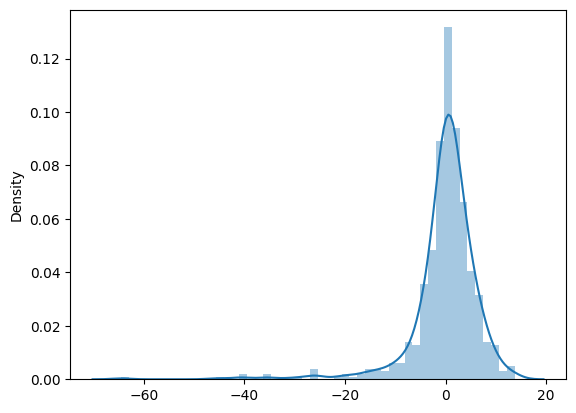

In [51]:
#NOrmality of a Residual
residual=y_test-y_pred
sns.distplot(residual)

In [53]:
#Evaluating the model
import math
print("Mean absolute error",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error",math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error 4.021111423776416
Mean squared error 48.67868141423696
Root Mean Squared Error 6.97701092261127


In [54]:
#Model Accuracy
x2=abs(y_pred-y_test)
y2=100*(x2/y_test)
accuracy=100-np.mean(y2)
print("Accuracy",round(accuracy,2),"%")

Accuracy 99.33 %


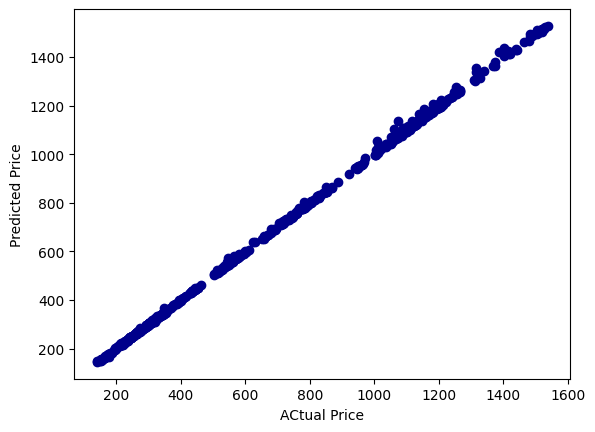

In [56]:
plt.scatter(y_test,y_pred,color="Darkblue")
plt.xlabel("ACtual Price")
plt.ylabel("Predicted Price")
plt.show()

<Axes: >

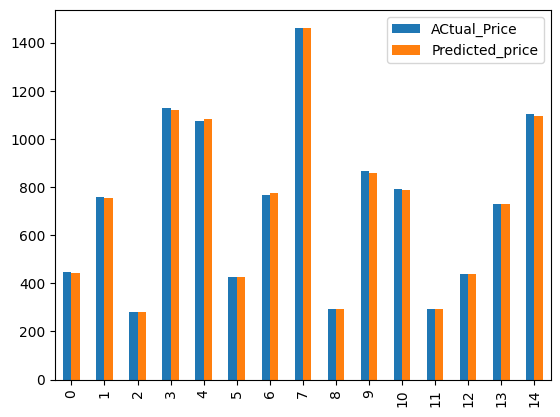

In [57]:
graph=dfr.head(15)
graph.plot(kind="bar")